<a href="https://colab.research.google.com/github/Vishu-121/Crop-Recommendation-System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• College project and I was part of a team that had 4 members.
• Role played during is Analytics And Logic Building.
• Objective : To make a system which will recommend the crops to grow on specific land under the changing conditions like (Temperature, Humidity, Nutrients, pH Level, Rainfall).

In [ ]:
#Importing various library which we have to use in this project
#Importing drive-library from colab module
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Importing the csv file using pandas library
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


1. Define Temperature where rainfall is maximum.

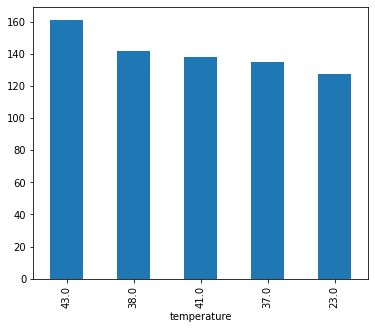

In [ ]:
#Groupby the temperature column with the mean of rainfall column
df.groupby(df["temperature"].round()).mean()["rainfall"].sort_values(ascending=False).head().plot(kind="bar",figsize=(6,5))

2. The Crop which is growing more in ph below 7.

In [ ]:
#Filter the dataframe by choosing only those rows which have pH less than 7
df_cr=df[df["ph"]<7]
print(df_cr["label"].max(),"is growing more in ph less than 7")

watermelon is growing more in ph less than 7


3. Peak of humidity, where temperature is above 20'C.

In [ ]:
#Filter the dataframe by choosing only those rows which have temperature is more than 20
df_t=df[df["temperature"]>20]
print(df_t["humidity"].max(),"is the peak of humidity, where temperature is above 20'C")

99.98187601 is the peak of humidity, where temperature is above 20'C


4. Crop which grows more in temperature above 25'C.

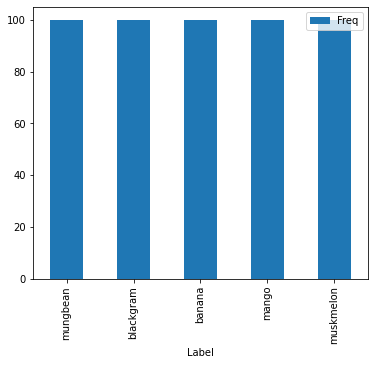

In [ ]:
#Filter the dataframe by choosing only those rows which have temperature more than 25
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_t=df[df["temperature"]>25]
for item in df_t["label"].unique():
  data.append([item, len(df_t[df_t["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=False).head()
data.plot(x="Label",y="Freq", kind="bar", figsize=(6,5))

5. Crop which grow more in heavy rainfall area(above 250).

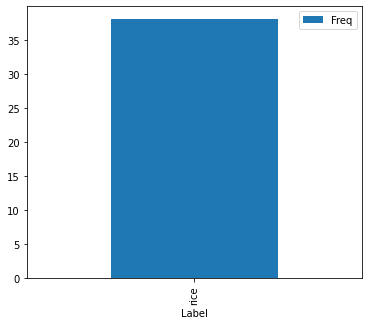

In [ ]:
#Filter the dataframe by choosing only those rows which have rainfall more than 250
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_ra=df[df["rainfall"]>250]
for item in df_ra["label"].unique():
  data.append([item, len(df_ra[df_ra["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=False).head()
data.plot(x="Label",y="Freq", kind="bar", figsize=(6,5))

6. Crop which grow more in low rainfall area(below 100).

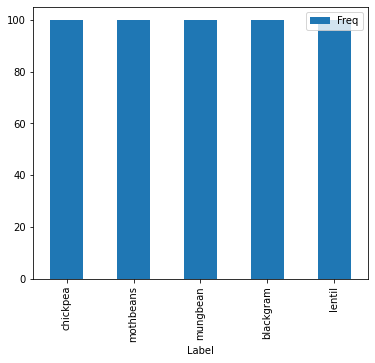

In [ ]:
#Filter the dataframe by choosing only those rows which have rainfall less than 100
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_rb=df[df["rainfall"]<100]
for item in df_rb["label"].unique():
  data.append([item, len(df_rb[df_rb["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=False).head()
data.plot(x="Label",y="Freq", kind="bar", figsize=(6,5))

7. Crop which grows in low temperature below 20'C.(More to less)

In [ ]:
#Filter the dataframe by choosing only those rows which have temperature less than 20
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_te=df[df["temperature"]<20]
for item in df_te["label"]:
  data.append([item, len(df_te[df_te["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=False)
data["Label"].unique()

array(['chickpea', 'kidneybeans', 'grapes', 'orange', 'pomegranate',
       'maize', 'pigeonpeas', 'lentil'], dtype=object)

8. Crop which grows in temperature above 40'C.(Less to more)

In [ ]:
#Filter the dataframe by choosing only those rows which have temperature more than 40
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_te=df[df["temperature"]>40]
for item in df_te["label"]:
  data.append([item, len(df_te[df_te["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=True)
data["Label"].unique()

array(['grapes', 'papaya'], dtype=object)

9. Crop which needs more (N,P,K).

In [ ]:
#Selecting the maximum npk having crops and display the crop which takes more npk value
N=df["N"].max()
P=df["P"].max()
K=df["K"].max()
npk_list=[N,P,K]

df_n=df[df["N"]==N]
df_p=df[df["P"]==P]
df_k=df[df["K"]==K]

print("These Crops need more N value",df_n["label"].unique())
print("These Crops need more P value",df_p["label"].unique())
print("These Crops need more K value",df_k["label"].unique())

These Crops need more N value ['cotton']
These Crops need more P value ['grapes' 'apple']
These Crops need more K value ['grapes' 'apple']


10. Crop which needs less (N,P,K).

In [ ]:
#Selecting the maximum npk having crops and display the crop which takes less npk value
N=df["N"].min()
P=df["P"].min()
K=df["K"].min()
npk_list=[N,P,K]

df_n=df[df["N"]==N]
df_p=df[df["P"]==P]
df_k=df[df["K"]==K]

print("These Crops need less N value",df_n["label"].unique())
print("These Crops need less P value",df_p["label"].unique())
print("These Crops need less K value",df_k["label"].unique())

These Crops need less N value ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
These Crops need less P value ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
These Crops need less K value ['orange']


11. On which temperature, the crops are growing more.(Top 5)

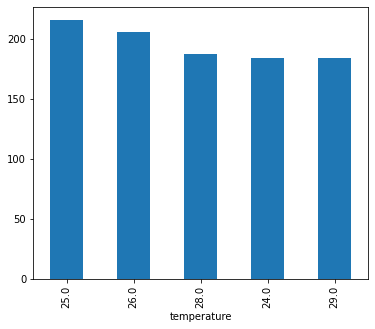

In [ ]:
#Groupby the temperature column with the count of label column
df.groupby(df["temperature"].round()).count()["label"].sort_values(ascending=False).head().plot(kind="bar", figsize=(6,5))

12. Least 5 crops which grows in temperature above 25'C.

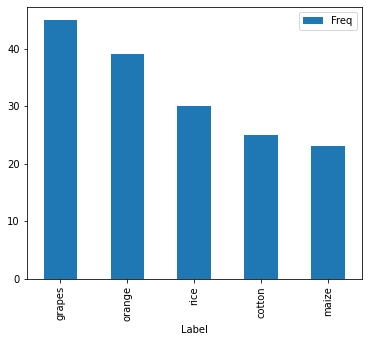

In [ ]:
#Filter the dataframe by choosing only those rows which have temperature more than 25
#Making another dataframe by converting that list of label,Frequency
#And then display it by the help of matplotlib graphs
data=[]
df_t=df[df["temperature"]>25]
for item in df_t["label"].unique():
  data.append([item, len(df_t[df_t["label"]==item])])
data=pd.DataFrame(data, columns=(["Label","Freq"]))
data=data.sort_values(by="Freq", ascending=False).tail()
data.plot(x="Label",y="Freq", kind="bar", figsize=(6,5))

['coffee'] is the crop which we can grow in these conditions


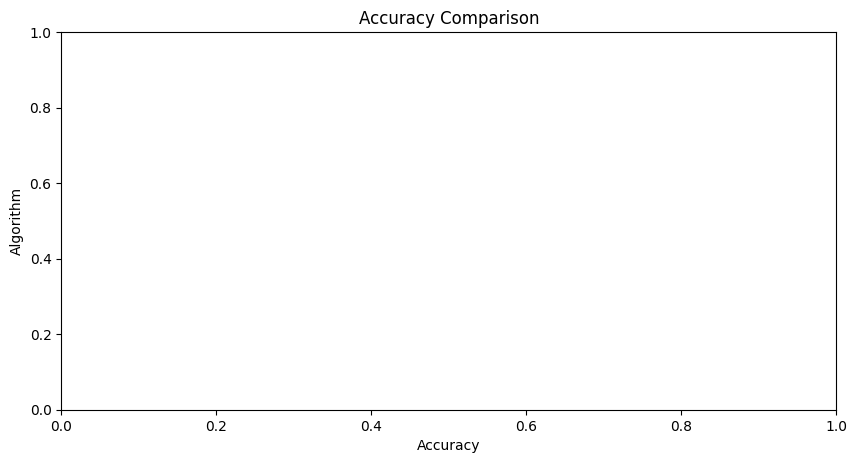

In [ ]:
#Separating Features and target labels
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']
labels=df['label']

#Initialising empty lists to append all model names and corresponding accuracy
acc=[]
model=[]

#Splitting into Test and Train data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,test_size=0.2,random_state=2)

#DECISION TREE</H1>
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')

from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

#Saving the trained decision tree model
import pickle

#dump the trained decision tree
DT_pkl_filename='DecisionTree.pkl'

#Open the file to save as pkl file
DT_Model_pkl=open(DT_pkl_filename,'wb')
pickle.dump(DecisionTree,DT_Model_pkl)

#Close the pickle instances
DT_Model_pkl.close()

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values=NaiveBayes.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Naive Bayes')

score = cross_val_score(NaiveBayes,features,target,cv=5)

#Saving the Naive bayes Classifier with pickle
#Dump the trained Naive Bayes Classifier with pickle
NB_pkl_filename='NBClassifier.pkl'

#Open the file to save as pkl file
NB_Model_pkl= open(NB_pkl_filename,'wb')
pickle.dump(NaiveBayes,NB_Model_pkl)
NB_Model_pkl.close()

#Support Vector Machine
from sklearn.svm import SVC
SVM=SVC(gamma='auto')
SVM.fit(Xtrain,Ytrain)
predicted_values=SVM.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)

score = cross_val_score(SVM,features,target,cv=5)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values=LogReg.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Logistic Regression')
model.append('SVM')

# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)

#Saving the trained Logistic Regression Model
# Dump the trained Logistic Regression Model with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'

# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)

# Close the pickle instances
LR_Model_pkl.close()

#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values=RF.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('RF')

score = cross_val_score(RF,features,target,cv=5)

import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'

# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

# Close the pickle instances
RF_Model_pkl.close()

#XGBoost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')

score = cross_val_score(XB,features,target,cv=5)

import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'

# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)

# Close the pickle instances
XB_Model_pkl.close()

#Accuracy Comparison
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():

#Random Predictions
	data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
	prediction = RF.predict(data)
print(prediction,"is the crop which we can grow in these conditions")